In [38]:
import networkx as nx 
from networkx import Graph, DiGraph
import pandas as pd
import time
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Question 1
## part a

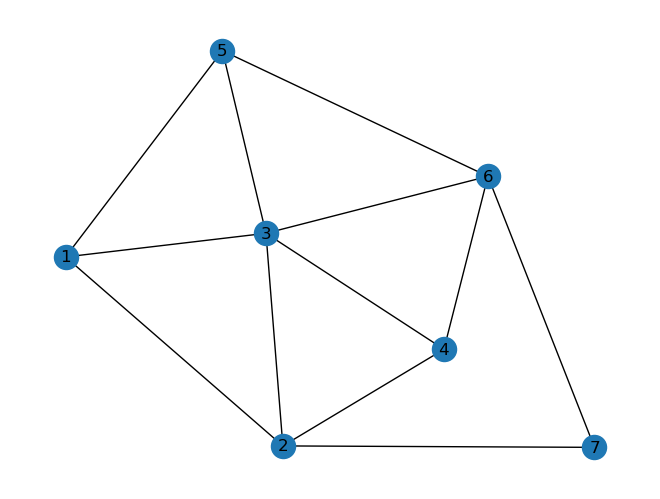

In [23]:
graph = Graph()
graph.add_edges_from([
    (1,2),
    (1,3),
    (1,5),
    (2,3),
    (2,4),
    (2,7),
    (3,5),
    (3,4),
    (3,6),
    (4,6),
    (5,6),
    (6,7),
    ])
pos = nx.spring_layout(graph)
nx.draw(graph, pos=pos)
nx.draw_networkx_labels(graph, pos=pos)
plt.plot()
plt.show()


$C = \frac{3 \times \text{number of triangles}}{\text{number of connected triplets}}$
## Triangles
$(v_1,v_2,v_3)$
$(v_1,v_3,v_5)$
$(v_3,v_5,v_6)$
$(v_3,v_2,v_4)$
$(v_3,v_4,v_6)$

## Triplets
$(v_1,v_2,v_3)$
$(v_2,v_1,v_3)$
$(v_1,v_3,v_2)$

$(v_1,v_3,v_5)$
$(v_1,v_5,v_3)$
$(v_3,v_1,v_5)$

$(v_3,v_5,v_6)$
$(v_3,v_6,v_5)$
$(v_5,v_6,v_3)$

$(v_3,v_2,v_4)$
$(v_3,v_4,v_2)$
$(v_4,v_3,v_2)$

$(v_3,v_4,v_6)$
$(v_3,v_6,v_4)$
$(v_4,v_3,v_6)$

$(v_4,v_2,v_7)$
$(v_4,v_6,v_7)$

$\text{number of triangles} =  5$\
$\text{number of connected triplets} =  17$

$C = \frac{3 \times 5}{17}$
$C = \frac{15}{17} \approx .882$



In [24]:
print(f"Global clustering coefficient: {nx.transitivity(graph)}")

Global clustering coefficient: 0.46875


## part b


$c_u = \frac{2 \times T(u)}{deg(u)(deg(u) - 1)}$
## Local Clustering Coefficient
$c_u(v_1) = \frac{2 \times 2}{3(3 - 1)}$\
$c_u(v_1) = \frac{4}{6} \approx .66 $

$c_u(v_2) = \frac{2 \times 2}{4(4 - 1)}$\
$c_u(v_2) = \frac{4}{12} \approx .33 $

$c_u(v_3) = \frac{2 \times 5}{5(5 - 1)}$\
$c_u(v_3) = \frac{10}{20} = .5 $

$c_u(v_4) = \frac{2 \times 2}{3(3 - 1)}$\
$c_u(v_4) = \frac{4}{6} \approx .66 $

$c_u(v_5) = \frac{2 \times 2}{3(3 - 1)}$\
$c_u(v_5) = \frac{4}{6} \approx .66 $

$c_u(v_6) = \frac{2 \times 2}{4(4 - 1)}$\
$c_u(v_6) = \frac{4}{12} \approx .33 $

$c_u(v_7) = \frac{2 \times 0}{2(2 - 1)}$\
$c_u(v_7) = \frac{0}{2} = 0 $

In [26]:
for node in sorted(graph.nodes):
    print(f"local clustering coefficient of node {node}: {nx.clustering(graph, node)}")

local clustering coefficient of node 1: 0.6666666666666666
local clustering coefficient of node 2: 0.3333333333333333
local clustering coefficient of node 3: 0.5
local clustering coefficient of node 4: 0.6666666666666666
local clustering coefficient of node 5: 0.6666666666666666
local clustering coefficient of node 6: 0.3333333333333333
local clustering coefficient of node 7: 0


# Question 2

In [29]:
def get_cosine_similarity(graph:Graph, pair:tuple):
    node1, node2 = pair
    node1_neighbors = set(nx.neighbors(graph, node1))
    node2_neighbors = set(nx.neighbors(graph, node2))
    intersection = set.intersection(node1_neighbors, node2_neighbors)
    inter_size = len(intersection)

    sqrt_deg_1 = np.sqrt(nx.degree(graph, node1))
    sqrt_deg_2 = np.sqrt(nx.degree(graph, node2))

    return inter_size / (sqrt_deg_1 * sqrt_deg_2)

def get_jaccard_similarity(graph:Graph, pair:tuple):
    node1, node2 = pair
    node1_neighbors = set(nx.neighbors(graph, node1))
    node2_neighbors = set(nx.neighbors(graph, node2))
    intersection = set.intersection(node1_neighbors, node2_neighbors)
    union = set.union(node1_neighbors, node2_neighbors)
    return len(intersection) / len(union)

In [30]:
asia_df = pd.read_csv('../data/lastfm_asia_edges.csv')
asia_df.head()

,node_1,node_2
0,0,747
1,1,4257
2,1,2194
3,1,580
4,1,6478


In [35]:
asia_graph = Graph()
asia_graph.add_edges_from(asia_df.values)
print(asia_graph)

Graph with 7624 nodes and 27806 edges


In [36]:
stats_df = pd.DataFrame({}, columns=['node1', 'node2', 'jaccard', 'cosine'])
stats_df.head()

,node1,node2,jaccard,cosine


In [45]:
nodes = asia_graph.nodes
for node1 in tqdm(nodes):
    for node2 in nodes:
        if node1 != node2:
            cosine = get_cosine_similarity(asia_graph, (node1, node2))
            jaccard = get_jaccard_similarity(asia_graph, (node1, node2))
            if (cosine + jaccard) > 0:
                row = pd.DataFrame({"node1":[node1], "node2":[node2], "jaccard":[jaccard], "cosine":[cosine]})
                stats_df = pd.concat([stats_df, row], ignore_index=True)

  0%|          | 0/7624 [00:00<?, ?it/s]

 13%|█▎        | 996/7624 [13:44<1:31:25,  1.21it/s]


KeyboardInterrupt: 

In [46]:
stats_df

,node1,node2,jaccard,cosine
0,0,3855,0.013699,0.117041
1,0,5610,0.021739,0.147442
2,0,5892,0.040000,0.200000
3,0,6363,0.125000,0.353553
4,0,4704,0.045455,0.213201
...,...,...,...,...
219042,2846,2480,0.058824,0.149071
219043,2846,5222,0.100000,0.182574
219044,2846,5097,0.047619,0.097590
219045,2846,1389,0.150000,0.273861


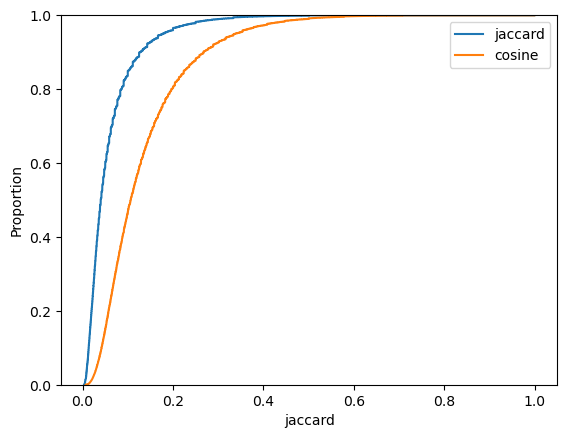

In [47]:
sns.ecdfplot(stats_df['jaccard'], label='jaccard')
sns.ecdfplot(stats_df['cosine'], label='cosine')
plt.legend()
plt.show()

# Question 3

In [48]:
n_graph = Graph()
n_graph.add_edges_from([
    (1,2),
    (1,3),
    (2,4),
    (3,4),
    (2,5),
    (4,5),
])
print(n_graph)

Graph with 5 nodes and 6 edges


In [65]:
adj = nx.adjacency_matrix(graph)
adj = adj.toarray()

eig = np.linalg.eigvals(adj)
max_eig = np.max(eig)

alpha = 1 / max_eig
I = np.identity(len(adj))

reg_equiv = np.linalg.inv(I - alpha*adj)

np.set_printoptions(precision=3)
print(f"The value for alpha: {alpha:.4f}")
print(f"The regular equivelance matrix: \n {reg_equiv}")

The value for alpha: 0.2763
The regular equivelance matrix: 
 [[1.143e+15 1.310e+15 1.685e+15 1.143e+15 1.190e+15 7.240e+14 1.310e+15]
 [1.310e+15 1.501e+15 1.930e+15 1.310e+15 1.363e+15 8.296e+14 1.501e+15]
 [1.685e+15 1.930e+15 2.482e+15 1.685e+15 1.752e+15 1.067e+15 1.930e+15]
 [1.143e+15 1.310e+15 1.685e+15 1.143e+15 1.190e+15 7.240e+14 1.310e+15]
 [1.190e+15 1.363e+15 1.752e+15 1.190e+15 1.237e+15 7.532e+14 1.363e+15]
 [7.240e+14 8.296e+14 1.067e+15 7.240e+14 7.532e+14 4.585e+14 8.296e+14]
 [1.310e+15 1.501e+15 1.930e+15 1.310e+15 1.363e+15 8.296e+14 1.501e+15]]


# Question 4